# Submitted by Vamsi Gamidi, B00834696

# 2.a. PCA for data visualization

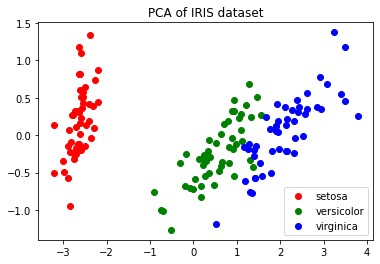

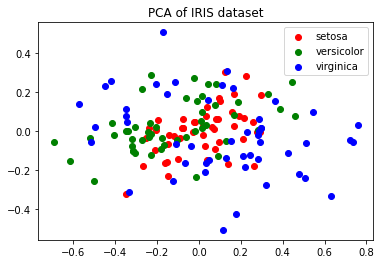

[0.92461872 0.05306648 0.01710261 0.00521218]


In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
pca = PCA(n_components=4)
transformed_data = pca.fit(X).transform(X)

plt.figure()
colors = ['r', 'g', 'b']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(transformed_data[:, :2][y == i, 0], transformed_data[:, :2][y == i, 1], color=color, alpha=1, lw=1,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(transformed_data[:, -2:][y == i, 0], transformed_data[:, -2:][y == i, 1], color=color, alpha=1, lw=1,
                label=target_name)
plt.legend(loc='best', scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

print(pca.explained_variance_ratio_)

# 2.b. PCA for feature selection

In [0]:
import numpy as np
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [17]:
mnist = fetch_openml('mnist_784')
accuracy_mlp = []
variance_list = [0.5, 0.75, 0.9, 0.95]
for variance in variance_list:
  pca = PCA(variance)
  scaler = StandardScaler()
  pca_data = pca.fit_transform(mnist.data)
  train_img, test_img, train_lbl, test_lbl = train_test_split(pca_data, mnist.target)
  train_img = scaler.fit_transform(train_img)
  test_img = scaler.transform(test_img)
  mlp = MLPClassifier(hidden_layer_sizes=(6),max_iter=600, random_state=0)
  mlp.fit(train_img,train_lbl)
  pred = mlp.predict(test_img)
  accuracy = accuracy_score(test_lbl, pred)
  print("variance: ",variance, " accuracy ", accuracy)
  accuracy_mlp.append(accuracy)


variance:  0.5  accuracy  0.8148571428571428
variance:  0.75  accuracy  0.8841714285714286
variance:  0.9  accuracy  0.9057714285714286
variance:  0.95  accuracy  0.9112


In [0]:
def eval_net(epochs, batch_size):

  losses = []
  train_acc = 0
  test_acc = 0

  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

  class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(1, 6, 3).double()   
      self.pool = nn.MaxPool2d(2, 2).double()
      self.conv2 = nn.Conv2d(6, 16, 3).double()
      self.fc1 = nn.Linear(16 * 5 * 5, 120).double()
      self.fc2 = nn.Linear(120, 84).double()
      self.fc3 = nn.Linear(84, 10).double()

    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = x.view(-1, 16 * 5 * 5) 
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.log_softmax(self.fc3(x), dim=1)
      return x
      
  print("Initializing the network ...")
  net = Net()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

  print("Training the network ...")
  for e in range(epochs):  
    print("Epoch: ", e+1)
    for idx, data in enumerate(train_loader, 0):
      inputs = torch.from_numpy(test_img.reshape(-1,1,28,28))
      labels = torch.from_numpy(test_lbl.astype(int))
      optimizer.zero_grad() 
      outputs = net(inputs) 
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step() 
      losses.append(loss.item())

  print("Evaluating on training data ...")
  correct = 0
  total = 0
  with torch.no_grad():
    for data in train_loader:
      inputs = torch.from_numpy(test_img.reshape(-1,1,28,28))
      labels = torch.from_numpy(test_lbl.astype(int))
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  train_acc = correct / total

  print("Evaluating on test data ...")
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
      inputs = torch.from_numpy(test_img.reshape(-1,1,28,28))
      labels = torch.from_numpy(test_lbl.astype(int))
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  test_acc = correct / total

  return losses, train_acc, test_acc


In [0]:
feature_sizes = []
accuracy_cnn = []
variance_list = [0.5, 0.75, 0.9, 0.95]
for variance in variance_list:
  pca = PCA(variance)
  pca_data = pca.fit_transform(mnist.data)
  feature_sizes.append(transformed_data.shape[-1])
  reconstructed_images = pca.inverse_transform(pca_data)

  train_img, test_img, train_lbl, test_lbl = train_test_split(reconstructed_images, mnist.target, shuffle=False)
  scaler = StandardScaler()
  train_img = scaler.fit_transform(train_img)
  test_img = scaler.transform(test_img)

  losses, train_acc, test_acc = eval_net(epochs=2, batch_size=100)
  print("Training accuracy: ", train_acc)
  print("Test accuracy: ", test_acc)
  accuracy_cnn.append(test_acc)
  plt.plot(losses)
  plt.show()

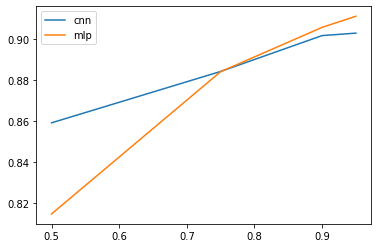

In [18]:
plt.plot([0.5,0.75,0.9,0.95], accuracy_cnn, label='cnn')
plt.plot([0.5,0.75,0.9,0.95], accuracy_mlp, label='mlp')
plt.legend(loc='best')
plt.show()